# Advanced Exercise 4

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

# Recreating Seaborn Exercises with Matplotlib 

---

### Seaborn
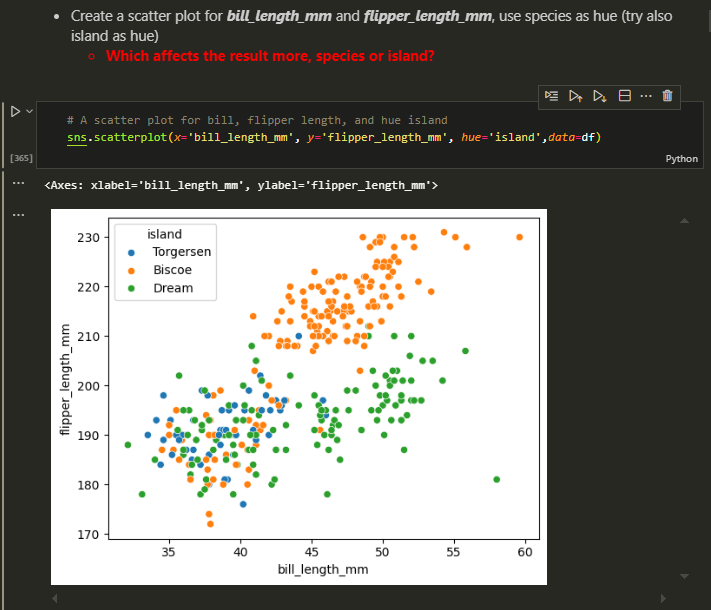

### Matplotlib

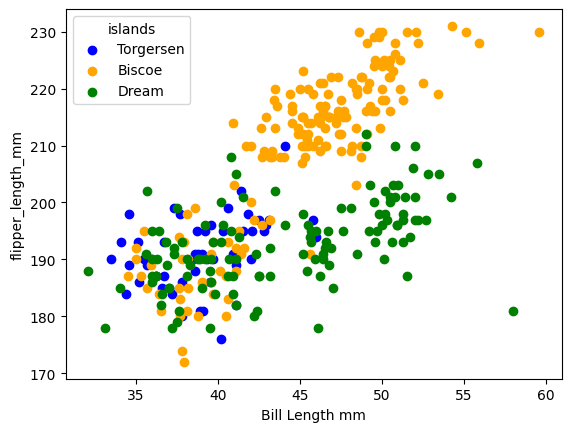

In [125]:
# Creating a portion of the penguins exercise, using hue.
# Filtered dataframes 
island_torgersen = df[df['island'] == 'Torgersen']
island_biscoe = df[df['island'] == 'Biscoe']
island_dream = df[df['island'] == 'Dream']

# Setting variables
x1, y1 = island_torgersen['bill_length_mm'], island_torgersen['flipper_length_mm']
x2, y2 = island_biscoe['bill_length_mm'], island_biscoe['flipper_length_mm']
x3, y3 = island_dream['bill_length_mm'], island_dream['flipper_length_mm']

# Making the plots
plt.scatter(x1,y1, color = 'blue', label = "Torgersen")
plt.scatter(x2,y2, color = 'orange', label = 'Biscoe' )
plt.scatter(x3,y3, color = 'green', label = 'Dream')

# Setting labels, legends and show
plt.xlabel('Bill Length mm')
plt.ylabel('flipper_length_mm')
plt.legend(title='islands')
plt.show()




---

### Seaborn
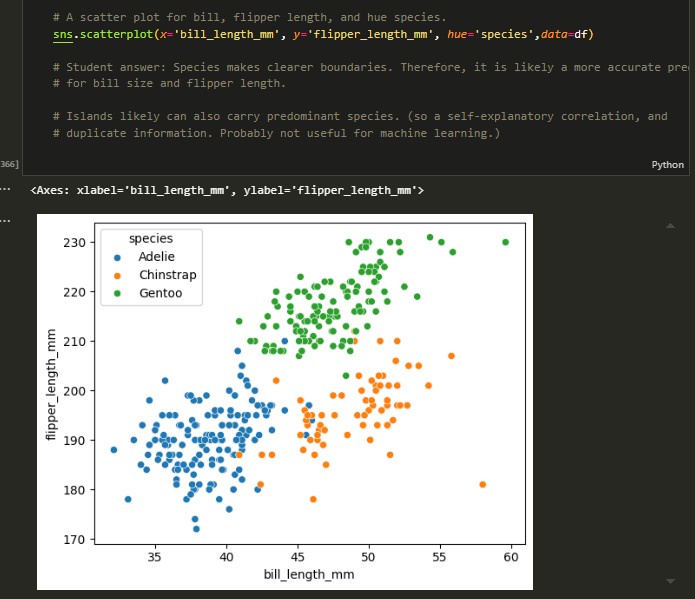

### Matplotlib

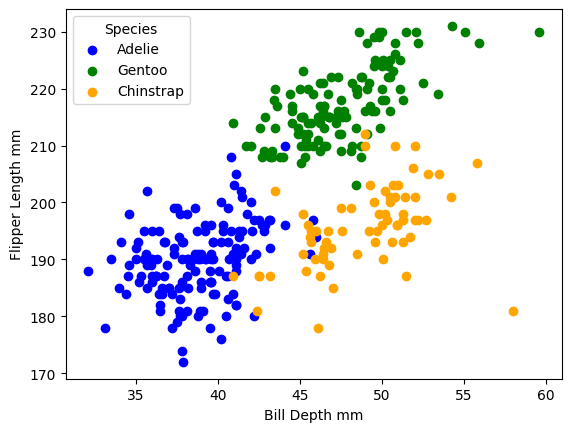

In [117]:
# Recreating another portion of the penguins exercise, using hue.
# Filtered dataframes 
species_adelie = df[df['species'] == 'Adelie']
species_gentoo = df[df['species'] == 'Gentoo']
species_chinstrap = df[df['species'] == 'Chinstrap']

# Setting variables
x1, y1 = species_adelie['bill_length_mm'], species_adelie['flipper_length_mm']
x2, y2 = species_gentoo['bill_length_mm'], species_gentoo['flipper_length_mm']
x3, y3 = species_chinstrap['bill_length_mm'], species_chinstrap['flipper_length_mm']

# Making the plots
plt.scatter(x1, y1, color='blue', label='Adelie')
plt.scatter(x2, y2, color='green', label='Gentoo')
plt.scatter(x3, y3, color='orange', label='Chinstrap')

# Setting labels, legends and show
plt.xlabel('Bill Depth mm')
plt.ylabel('Flipper Length mm')
plt.legend(title='Species')
plt.show()



---

### Seaborn
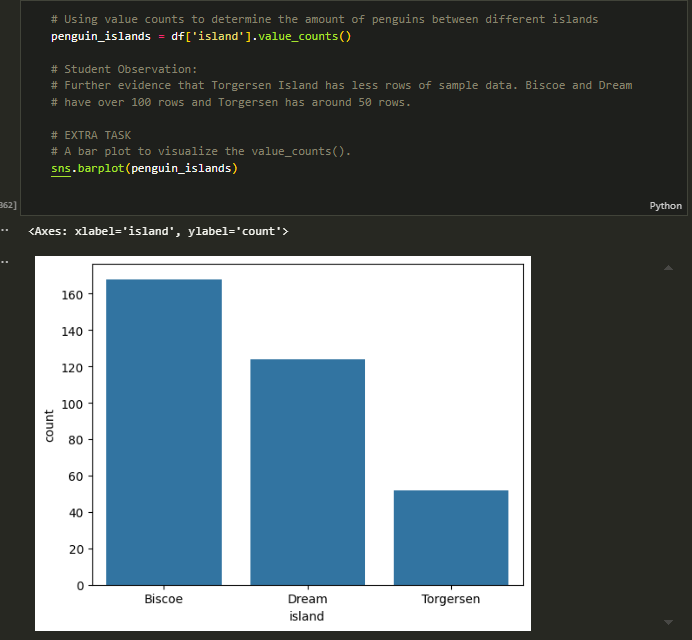

### Matplotlib

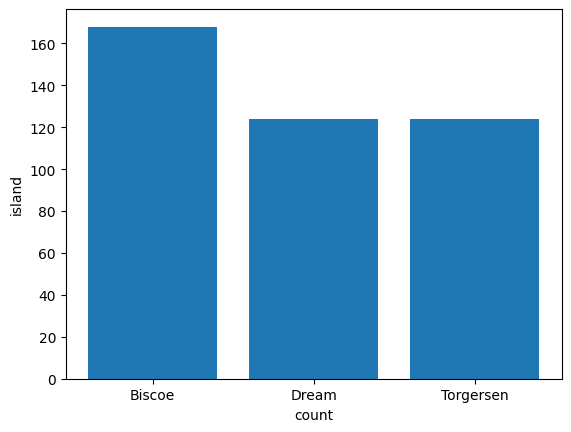

In [138]:

# Column variable
island_column = df['island']

# Making count values
count_biscoe = island_column[df['island'] == 'Biscoe'].count()
count_dream = island_column[df['island'] == 'Dream'].count()
count_torgersen = island_column[df['island'] == 'Dream'].count()

# Setting X and Y values 
values = [count_biscoe, count_dream, count_torgersen]
names =  ['Biscoe', 'Dream', 'Torgersen']

# Creating the bar plot


plt.bar(names, values)
plt.xlabel('count')
plt.ylabel('island')
plt.show()

---

# Recreating exercises with Bokeh